In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, precision_score, recall_score, f1_score, roc_auc_score, auc, roc_curve, mean_squared_error, r2_score


In [2]:
padsplit_credit_filepath = "/home/kidconnect/work/data/interviews/padsplit/applicant_credit.csv"

In [3]:
padsplit_pdf = pd.read_csv(padsplit_credit_filepath)

In [4]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_colwidth', -1)

In [5]:
padsplit_pdf

id  bucket_min  bucket_max  credit_score  trades_count  \
0    0.0    100.0       100.0       414.0        NaN             
1    1.0    100.0       100.0      NaN           NaN             
2    2.0    100.0       100.0      NaN           NaN             
3    3.0    100.0       100.0       550.0         1.0            
4    4.0    100.0       100.0       601.0         3.0            
5    5.0    100.0       100.0       504.0        NaN             
6    6.0    100.0       100.0      NaN           NaN             
7    7.0    100.0       100.0       515.0        NaN             
8    8.0    100.0       100.0       520.0        NaN             
9    9.0    100.0       100.0      NaN           NaN             
10   10.0   100.0       100.0       541.0         1.0            
11   11.0   100.0       100.0      NaN           NaN             
12   12.0   100.0       100.0       0.0          NaN             
13   13.0   100.0       100.0       589.0        NaN             
14   14.0   100.0       100.0      NaN           NaN             
15   15.0   100.0       100.0      NaN           NaN             
16   16.0   100.0       100.0       545.0         9.0            
17   17.0   100.0       100.0      NaN           NaN             
18   18.0   100.0       100.0       553.0        NaN             
19   19.0   100.0       100.0       593.0         7.0            
20   20.0   100.0       100.0      NaN           NaN             
21   21.0   100.0       100.0      NaN           NaN             
22   22.0   100.0       100.0      NaN           NaN             
23   23.0   100.0       100.0       559.0         7.0            
24   24.0   100.0       100.0      NaN           NaN             
25   25.0   100.0       100.0       625.0        NaN             
26   26.0   100.0       100.0      NaN           NaN             
27   27.0   100.0       100.0       494.0         3.0            
28   28.0   100.0       100.0       528.0         0.0            
29   29.0   100.0       100.0      NaN           NaN             
30   30.0   100.0       100.0       601.0        NaN             
31   31.0   100.0       100.0       0.0          NaN             
32   32.0   100.0       100.0       0.0          NaN             
33   33.0   100.0       100.0       557.0        NaN             
34   34.0   100.0       100.0      NaN           NaN             
35   35.0   100.0       100.0       453.0         1.0            
36   36.0   100.0       100.0      NaN           NaN             
37   37.0   100.0       100.0      NaN           NaN             
38   38.0   100.0       100.0       568.0         5.0            
39   39.0   100.0       100.0       640.0         11.0           
40   40.0   100.0       100.0      NaN           NaN             
41   41.0   100.0       100.0       541.0         9.0            
42   42.0   100.0       100.0       0.0           0.0            
43   43.0   100.0       100.0      NaN           NaN             
44   44.0   100.0       100.0      NaN           NaN             
45   45.0   100.0       100.0      NaN            2.0            
46   46.0   100.0       100.0      NaN           NaN             
47   47.0   100.0       100.0       508.0         3.0            
48   48.0   100.0       100.0       530.0         37.0           
49   49.0   100.0       100.0       585.0        NaN             
50   50.0   100.0       100.0      NaN           NaN             
51   51.0   100.0       100.0      NaN           NaN             
52   52.0   100.0       100.0       585.0         1.0            
53   53.0   100.0       100.0       562.0         17.0           
54   54.0   100.0       100.0       679.0        NaN             
55   55.0   100.0       100.0      NaN           NaN             
56   56.0   100.0       100.0       550.0         1.0            
57   57.0   100.0       100.0       583.0         5.0            
58   58.0   100.0       100.0       563.0         7.0            
59   59.0   100.0       100.0      NaN          

In [6]:
padsplit_pdf.shape

(881, 29)

In [7]:
padsplit_pdf.describe()

id  bucket_min  bucket_max  credit_score  trades_count  \
count  881.00000  881.000000  881.000000  497.000000    351.000000     
mean   440.00000  89.382520   90.666288   484.863179    6.501425       
std    254.46709  19.643646   15.607614   206.199513    9.638279       
min    0.00000    0.000000    28.000000   0.000000      0.000000       
25%    220.00000  87.000000   87.000000   489.000000    1.000000       
50%    440.00000  100.000000  100.000000  546.000000    3.000000       
75%    660.00000  100.000000  100.000000  596.000000    8.000000       
max    880.00000  100.000000  100.000000  796.000000    74.000000      

       student_loan_debt_amount  bank_revolving_trades_count  \
count  265.000000                348.000000                    
mean   10081.939623              1.206897                      
std    26813.537757              2.049182                      
min    0.000000                  0.000000                      
25%    0.000000                  0.000000                      
50%    0.000000                  0.000000                      
75%    3249.000000               2.000000                      
max    217554.000000             11.000000                     

       accounts_in_collections_count  bankruptcy_claim_count  \
count  533.000000                     447.000000               
mean   1.570356                       0.038031                 
std    2.743623                       0.202858                 
min    0.000000                       0.000000                 
25%    0.000000                       0.000000                 
50%    0.000000                       0.000000                 
75%    2.000000                       0.000000                 
max    16.000000                      2.000000                 

       total_collections_amount  medical_collections_amount  \
count  533.000000                412.000000                   
mean   1954.654784               1121.334951                  
std    5503.616715               3968.620511                  
min    0.000000                  0.000000                     
25%    0.000000                  0.000000                     
50%    0.000000                  0.000000                     
75%    1600.000000               845.500000                   
max    56785.000000              64966.000000                 

       student_loan_collections_amount  inquiry_count  eviction_count  \
count  138.000000                       353.000000     286.000000       
mean   2256.927536                      3.305949       0.080420         
std    8470.208930                      5.351019       0.379983         
min    0.000000                         0.000000       0.000000         
25%    0.000000                         0.000000       0.000000         
50%    0.000000                         2.000000       0.000000         
75%    0.000000                         4.000000       0.000000         
max    56785.000000                     54.000000      4.000000         

       student_loan_collections_account_count  \
count  109.000000                               
mean   0.045872                                 
std    0.210173                                 
min    0.000000                                 
25%    0.000000                                 
50%    0.000000                                 
75%    0.000000                                 
max    1.000000                                 

       medical_collections_account_count  landlord_case_count  \
count  291.000000                         397.000000            
mean   0.962199                           0.765743              
std    1.818093                           1.355138              
min    0.000000                           0.000000              
25%    0.000000                           0.000000              
50%    0.000000                           0.000000              
75%    1.000000                           1.000000              
max    14.000000       

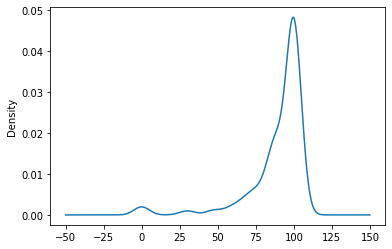

In [9]:
padsplit_pdf['bucket_min'].plot.kde()

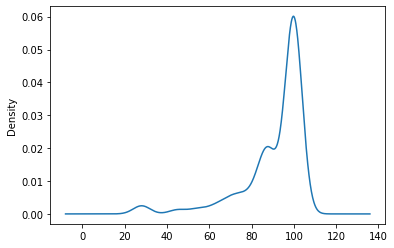

In [10]:
padsplit_pdf['bucket_max'].plot.kde()

In [11]:
padsplit_pdf['label'] = np.where(padsplit_pdf['bucket_min'] > 87.5, 1, 0)

In [12]:
padsplit_pdf

id  bucket_min  bucket_max  credit_score  trades_count  \
0    0.0    100.0       100.0       414.0        NaN             
1    1.0    100.0       100.0      NaN           NaN             
2    2.0    100.0       100.0      NaN           NaN             
3    3.0    100.0       100.0       550.0         1.0            
4    4.0    100.0       100.0       601.0         3.0            
5    5.0    100.0       100.0       504.0        NaN             
6    6.0    100.0       100.0      NaN           NaN             
7    7.0    100.0       100.0       515.0        NaN             
8    8.0    100.0       100.0       520.0        NaN             
9    9.0    100.0       100.0      NaN           NaN             
10   10.0   100.0       100.0       541.0         1.0            
11   11.0   100.0       100.0      NaN           NaN             
12   12.0   100.0       100.0       0.0          NaN             
13   13.0   100.0       100.0       589.0        NaN             
14   14.0   100.0       100.0      NaN           NaN             
15   15.0   100.0       100.0      NaN           NaN             
16   16.0   100.0       100.0       545.0         9.0            
17   17.0   100.0       100.0      NaN           NaN             
18   18.0   100.0       100.0       553.0        NaN             
19   19.0   100.0       100.0       593.0         7.0            
20   20.0   100.0       100.0      NaN           NaN             
21   21.0   100.0       100.0      NaN           NaN             
22   22.0   100.0       100.0      NaN           NaN             
23   23.0   100.0       100.0       559.0         7.0            
24   24.0   100.0       100.0      NaN           NaN             
25   25.0   100.0       100.0       625.0        NaN             
26   26.0   100.0       100.0      NaN           NaN             
27   27.0   100.0       100.0       494.0         3.0            
28   28.0   100.0       100.0       528.0         0.0            
29   29.0   100.0       100.0      NaN           NaN             
30   30.0   100.0       100.0       601.0        NaN             
31   31.0   100.0       100.0       0.0          NaN             
32   32.0   100.0       100.0       0.0          NaN             
33   33.0   100.0       100.0       557.0        NaN             
34   34.0   100.0       100.0      NaN           NaN             
35   35.0   100.0       100.0       453.0         1.0            
36   36.0   100.0       100.0      NaN           NaN             
37   37.0   100.0       100.0      NaN           NaN             
38   38.0   100.0       100.0       568.0         5.0            
39   39.0   100.0       100.0       640.0         11.0           
40   40.0   100.0       100.0      NaN           NaN             
41   41.0   100.0       100.0       541.0         9.0            
42   42.0   100.0       100.0       0.0           0.0            
43   43.0   100.0       100.0      NaN           NaN             
44   44.0   100.0       100.0      NaN           NaN             
45   45.0   100.0       100.0      NaN            2.0            
46   46.0   100.0       100.0      NaN           NaN             
47   47.0   100.0       100.0       508.0         3.0            
48   48.0   100.0       100.0       530.0         37.0           
49   49.0   100.0       100.0       585.0        NaN             
50   50.0   100.0       100.0      NaN           NaN             
51   51.0   100.0       100.0      NaN           NaN             
52   52.0   100.0       100.0       585.0         1.0            
53   53.0   100.0       100.0       562.0         17.0           
54   54.0   100.0       100.0       679.0        NaN             
55   55.0   100.0       100.0      NaN           NaN             
56   56.0   100.0       100.0       550.0         1.0            
57   57.0   100.0       100.0       583.0         5.0            
58   58.0   100.0       100.0       563.0         7.0            
59   59.0   100.0       100.0      NaN          

In [13]:
padsplit_pdf['label'].value_counts()

1    650
0    231
Name: label, dtype: int64

* trades count - credit lines
* bank revolving trade counts - debit lines

In [37]:
def feature_hist(df, feature):
    df[feature].hist()

In [18]:
numeric_cols = padsplit_pdf.select_dtypes([np.number]).columns

In [19]:
numeric_cols

Index(['id', 'bucket_min', 'bucket_max', 'credit_score', 'trades_count',
       'student_loan_debt_amount', 'bank_revolving_trades_count',
       'accounts_in_collections_count', 'bankruptcy_claim_count',
       'total_collections_amount', 'medical_collections_amount',
       'student_loan_collections_amount', 'inquiry_count', 'eviction_count',
       'student_loan_collections_account_count',
       'medical_collections_account_count', 'landlord_case_count',
       'landlord_case_total_amount', 'utilities_case_count',
       'utilities_case_total_amount', 'other_collections_amount',
       'oldest_collections_account_in_weeks', 'weeks_since_bankruptcy',
       'weeks_since_latest_landlord_case', 'weeks_since_latest_eviction',
       'label'],
      dtype='object')

In [20]:
aux_cols = ['id', 'bucket_min', 'bucket_max']

In [34]:
feature_cols = [col for col in numeric_cols if col not in aux_cols]

credit_score
trades_count
student_loan_debt_amount
bank_revolving_trades_count
accounts_in_collections_count
bankruptcy_claim_count
total_collections_amount
medical_collections_amount
student_loan_collections_amount
inquiry_count
eviction_count
student_loan_collections_account_count
medical_collections_account_count
landlord_case_count
landlord_case_total_amount
utilities_case_count
utilities_case_total_amount
other_collections_amount
oldest_collections_account_in_weeks
weeks_since_bankruptcy
weeks_since_latest_landlord_case
weeks_since_latest_eviction
label


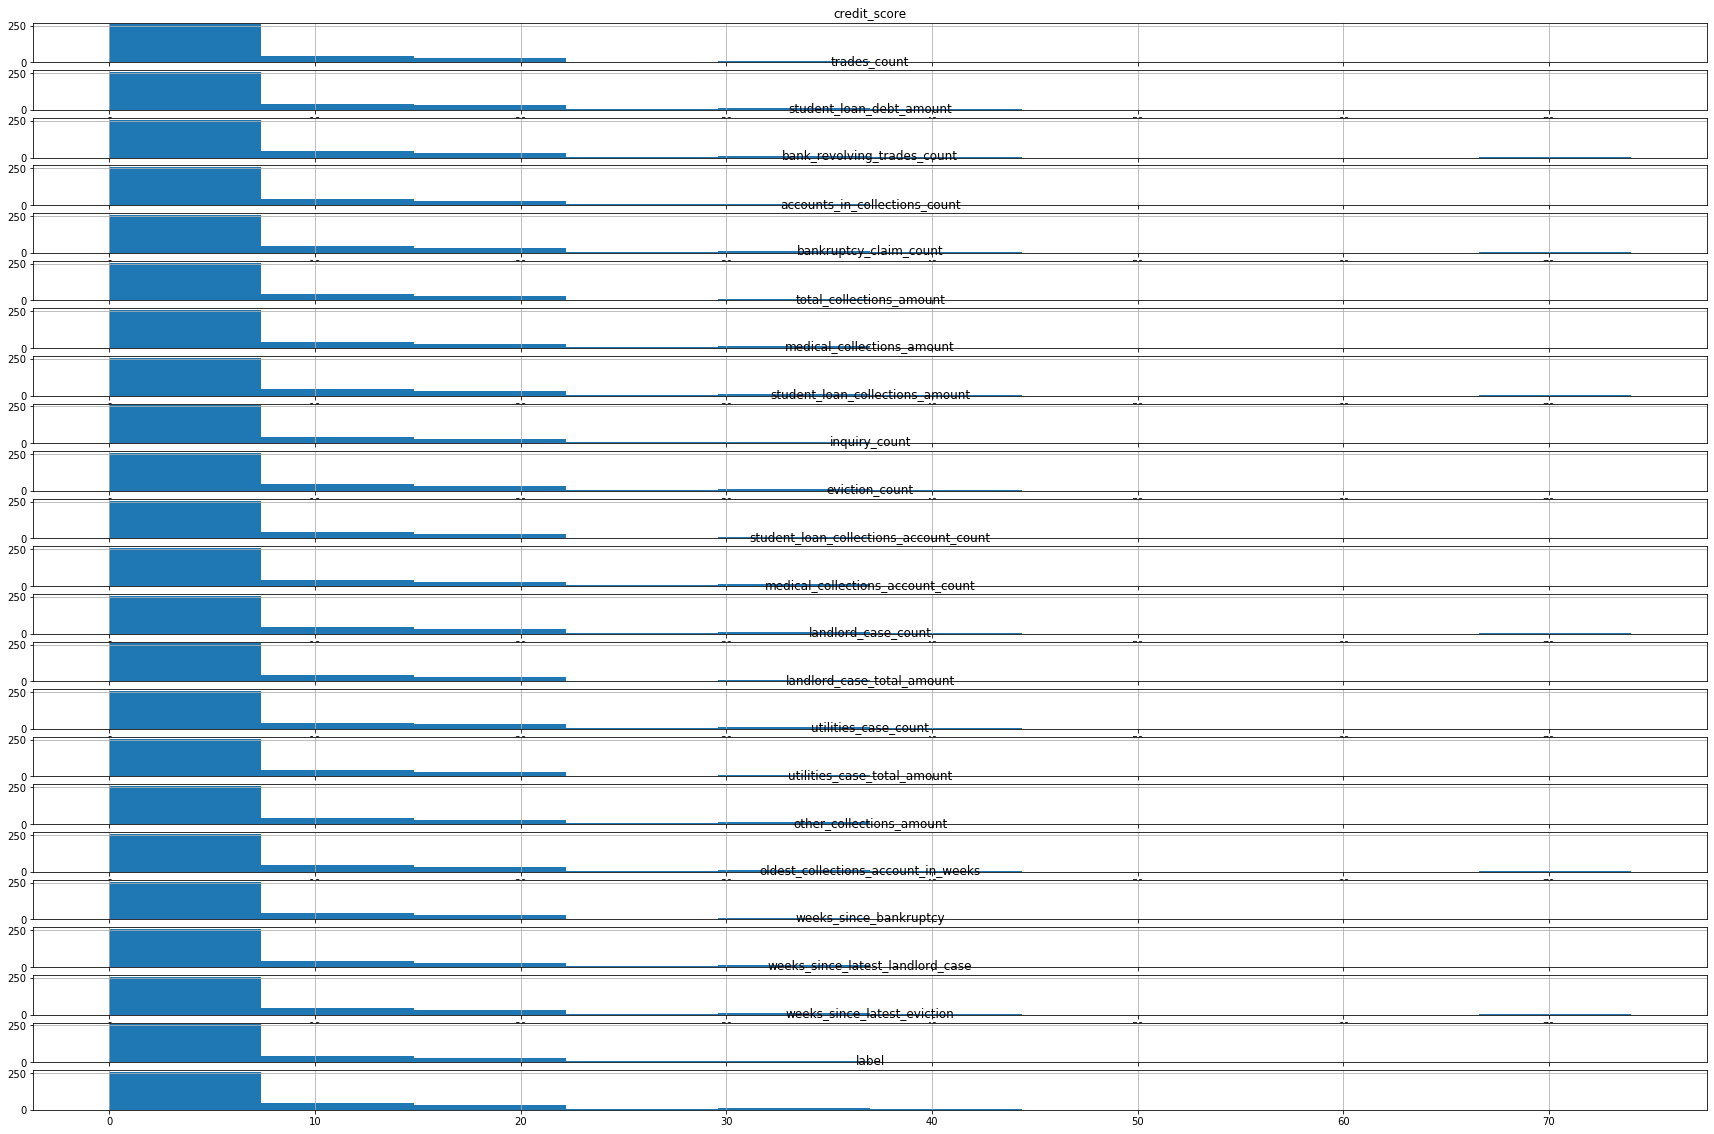

In [40]:
fig = plt.figure(figsize=(30,20))
n = len(numeric_cols) - 3
for i, col in enumerate(feature_cols):
    print(col)
    ax = fig.add_subplot(n, 1, i+1)
    ax.set_title(col)
    feature_hist(padsplit_pdf, 'trades_count')
plt.show()

In [42]:
feature_corr = padsplit_pdf[feature_cols].corr()

In [43]:
feature_corr

credit_score  trades_count  \
credit_score                            1.000000      0.186966       
trades_count                            0.186966      1.000000       
student_loan_debt_amount                0.083456      0.279744       
bank_revolving_trades_count             0.180243      0.493553       
accounts_in_collections_count           0.083371     -0.071838       
bankruptcy_claim_count                  0.060140      0.392969       
total_collections_amount                0.085146     -0.093847       
medical_collections_amount              0.036268     -0.059325       
student_loan_collections_amount         0.095178     -0.131834       
inquiry_count                           0.068824      0.226776       
eviction_count                          0.051780      0.026104       
student_loan_collections_account_count  0.061051      0.029315       
medical_collections_account_count       0.035423     -0.029905       
landlord_case_count                     0.030202      0.081703       
landlord_case_total_amount              0.071076      0.089393       
utilities_case_count                    0.035702      0.091807       
utilities_case_total_amount            -0.032009      0.110054       
other_collections_amount               -0.085146      0.093847       
oldest_collections_account_in_weeks     0.058637     -0.145072       
weeks_since_bankruptcy                  0.022728     -0.498080       
weeks_since_latest_landlord_case       -0.097171     -0.081638       
weeks_since_latest_eviction            -0.101213     -0.490453       
label                                   0.067918      0.092021       

                                        student_loan_debt_amount  \
credit_score                            0.083456                   
trades_count                            0.279744                   
student_loan_debt_amount                1.000000                   
bank_revolving_trades_count             0.092616                   
accounts_in_collections_count           0.114822                   
bankruptcy_claim_count                 -0.052763                   
total_collections_amount                0.041347                   
medical_collections_amount              0.081034                   
student_loan_collections_amount        -0.043762                   
inquiry_count                          -0.008866                   
eviction_count                          0.135711                   
student_loan_collections_account_count  1.000000                   
medical_collections_account_count      -0.052148                   
landlord_case_count                    -0.062076                   
landlord_case_total_amount             -0.035541                   
utilities_case_count                   -0.046250                   
utilities_case_total_amount            -0.027304                   
other_collections_amount               -0.041347                   
oldest_collections_account_in_weeks     0.083989                   
weeks_since_bankruptcy                 NaN                         
weeks_since_latest_landlord_case        0.451970                   
weeks_since_latest_eviction            -0.152666                   
label                                  -0.039914                   

                                        bank_revolving_trades_count  \
credit_score                            0.180243                      
trades_count                            0.493553                      
student_loan_debt_amount                0.092616                      
bank_revolving_trades_count             1.000000                      
accounts_in_collections_count          -0.120721                      
bankruptcy_claim_count                  0.275602                      
total_collections_amount               -0.124893                      
medical_collections_amount             -0.100012                      
student_loan_collections_amount        -0.117467                      
inquiry_count   

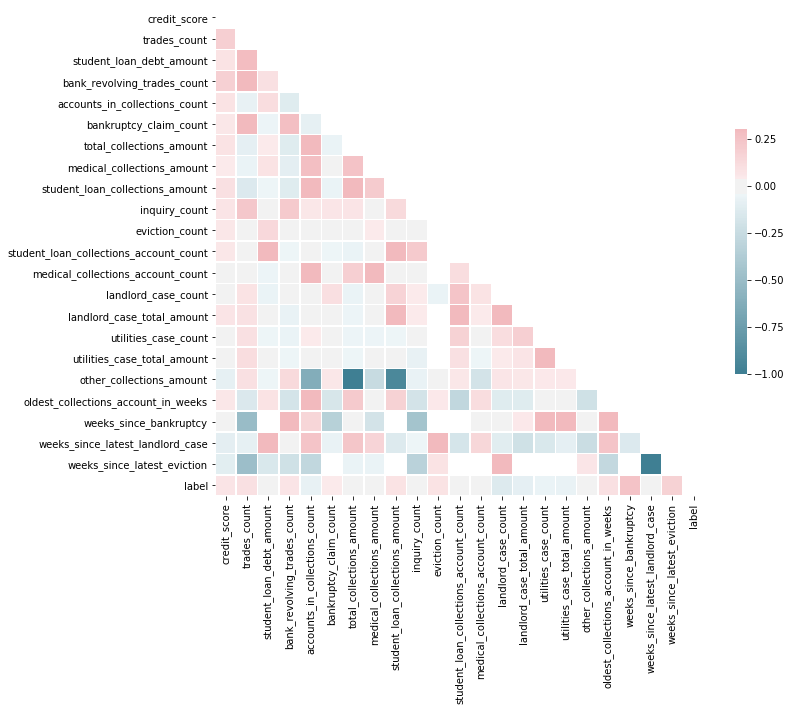

In [45]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(feature_corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(feature_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [48]:
collection_features = ['other_collections_amount'
                       , 'accounts_in_collections_count'
                       ,'total_collections_amount','student_loan_collections_amount']

In [49]:
for feature in collection_features:
    print(feature)
    print(padsplit_pdf[feature].count())

other_collections_amount
533
accounts_in_collections_count
533
total_collections_amount
533
student_loan_collections_amount
138


In [52]:
corr_features_eviction = ['weeks_since_latest_eviction','weeks_since_latest_landlord_case']

In [53]:
for feature in corr_features_eviction:
    print(feature)
    print(padsplit_pdf[feature].count())

weeks_since_latest_eviction
16
weeks_since_latest_landlord_case
148


In [54]:
corr_filtered_features = ['other_collections_amount'
                       , 'accounts_in_collections_count'
                         ,'weeks_since_latest_eviction']

In [55]:
corr_selected_features = [feature for feature in feature_cols if feature not in corr_filtered_features]

In [56]:
corr_selected_features

['credit_score',
 'trades_count',
 'student_loan_debt_amount',
 'bank_revolving_trades_count',
 'bankruptcy_claim_count',
 'total_collections_amount',
 'medical_collections_amount',
 'student_loan_collections_amount',
 'inquiry_count',
 'eviction_count',
 'student_loan_collections_account_count',
 'medical_collections_account_count',
 'landlord_case_count',
 'landlord_case_total_amount',
 'utilities_case_count',
 'utilities_case_total_amount',
 'oldest_collections_account_in_weeks',
 'weeks_since_bankruptcy',
 'weeks_since_latest_landlord_case',
 'label']

In [57]:
len(corr_selected_features)

20

In [58]:
padsplit_pdf[corr_selected_features].dropna().shape

(2, 20)

In [64]:
for feature in corr_selected_features:
    feature_median = padsplit_pdf[feature].median()
    padsplit_pdf[feature] = padsplit_pdf[feature].fillna(feature_median)

In [59]:
padsplit_pdf.dtypes

id                                        float64
bucket_min                                float64
bucket_max                                float64
credit_score                              float64
trades_count                              float64
student_loan_debt_amount                  float64
bank_revolving_trades_count               float64
accounts_in_collections_count             float64
bankruptcy_claim_count                    float64
latest_bankruptcy_date                    object 
total_collections_amount                  float64
medical_collections_amount                float64
student_loan_collections_amount           float64
oldest_collections_account_date           object 
latest_landlord_case_date                 object 
inquiry_count                             float64
eviction_count                            float64
latest_eviction_date                      object 
student_loan_collections_account_count    float64
medical_collections_account_count         float64


In [65]:
padsplit_pdf[corr_selected_features].dropna().shape

(881, 20)

In [90]:
def down_sample(df,class_col):
    # Separate majority and minority classes
    print("Downsample time.")
    df_majority = df[df[class_col]==0]
    df_minority = df[df[class_col]==1]
    if len(df_majority) < len(df_minority):
        df_majority = df[df[class_col]==1]
        df_minority = df[df[class_col]==0]
        
    
    df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=df_minority.shape[0],     # to match minority class
                                 random_state=123)
    print("Downsample completed")
    return pd.concat([df_majority_downsampled, df_minority])

In [117]:
def rfc_model_train(X_train, y_train, features):
    rfc = RandomForestClassifier(n_estimators=5000, random_state=42, max_depth=5)
    rfc.fit(X_train[features], y_train)
    return rfc

In [118]:
def rfc_model_train_test(df,features,label):
    driverset = down_sample(df,label)
    X, y = driverset.drop(columns=label), driverset[label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
    return X_test, y_test, rfc_model_train(X_train, y_train,features)

In [119]:
corr_selected_features + ['label']

['credit_score',
 'trades_count',
 'student_loan_debt_amount',
 'bank_revolving_trades_count',
 'bankruptcy_claim_count',
 'total_collections_amount',
 'medical_collections_amount',
 'student_loan_collections_amount',
 'inquiry_count',
 'eviction_count',
 'student_loan_collections_account_count',
 'medical_collections_account_count',
 'landlord_case_count',
 'landlord_case_total_amount',
 'utilities_case_count',
 'utilities_case_total_amount',
 'oldest_collections_account_in_weeks',
 'weeks_since_bankruptcy',
 'weeks_since_latest_landlord_case',
 'label']

In [120]:
corr_selected_features = [feature for feature in corr_selected_features if feature != 'label']

In [121]:
corr_selected_features

['credit_score',
 'trades_count',
 'student_loan_debt_amount',
 'bank_revolving_trades_count',
 'bankruptcy_claim_count',
 'total_collections_amount',
 'medical_collections_amount',
 'student_loan_collections_amount',
 'inquiry_count',
 'eviction_count',
 'student_loan_collections_account_count',
 'medical_collections_account_count',
 'landlord_case_count',
 'landlord_case_total_amount',
 'utilities_case_count',
 'utilities_case_total_amount',
 'oldest_collections_account_in_weeks',
 'weeks_since_bankruptcy',
 'weeks_since_latest_landlord_case']

In [122]:
driverset = padsplit_pdf[corr_selected_features + ['label']]

In [123]:
driverset

credit_score  trades_count  student_loan_debt_amount  \
0    414.0         3.0           0.0                        
1    546.0         3.0           0.0                        
2    546.0         3.0           0.0                        
3    550.0         1.0           0.0                        
4    601.0         3.0           0.0                        
5    504.0         3.0           0.0                        
6    546.0         3.0           0.0                        
7    515.0         3.0           0.0                        
8    520.0         3.0           0.0                        
9    546.0         3.0           0.0                        
10   541.0         1.0           0.0                        
11   546.0         3.0           0.0                        
12   0.0           3.0           0.0                        
13   589.0         3.0           0.0                        
14   546.0         3.0           0.0                        
15   546.0         3.0           0.0                        
16   545.0         9.0           26962.0                    
17   546.0         3.0           0.0                        
18   553.0         3.0           0.0                        
19   593.0         7.0           0.0                        
20   546.0         3.0           0.0                        
21   546.0         3.0           0.0                        
22   546.0         3.0           0.0                        
23   559.0         7.0           0.0                        
24   546.0         3.0           0.0                        
25   625.0         3.0           0.0                        
26   546.0         3.0           0.0                        
27   494.0         3.0           27702.0                    
28   528.0         0.0           0.0                        
29   546.0         3.0           0.0                        
30   601.0         3.0           0.0                        
31   0.0           3.0           0.0                        
32   0.0           3.0           0.0                        
33   557.0         3.0           0.0                        
34   546.0         3.0           0.0                        
35   453.0         1.0           4468.0                     
36   546.0         3.0           0.0                        
37   546.0         3.0           0.0                        
38   568.0         5.0           0.0                        
39   640.0         11.0          1.0                        
40   546.0         3.0           0.0                        
41   541.0         9.0           0.0                        
42   0.0           0.0           0.0                        
43   546.0         3.0           0.0                        
44   546.0         3.0           0.0                        
45   546.0         2.0           3879.0                     
46   546.0         3.0           0.0                        
47   508.0         3.0           0.0                        
48   530.0         37.0          0.0                        
49   585.0         3.0           0.0                        
50   546.0         3.0           0.0                        
51   546.0         3.0           0.0                        
52   585.0         1.0           0.0                        
53   562.0         17.0          92675.0                    
54   679.0         3.0           0.0                        
55   546.0         3.0           0.0                        
56   550.0         1.0           0.0                        
57   583.0         5.0           86834.0                    
58   563.0         7.0           0.0                        
59   546.0         3.0           0.0                        
60   449.0         10.0          0.0                        
61   576.0         3.0           0.0                        
62   606.0         0.0           0.0                        
63   0.0           3.0           0.0                        
64   510.0         3.0           0.0    

In [124]:
padsplit_label = 'label'
X_test_feat_select, y_test_feat_select, rfc_feat_select = rfc_model_train_test(padsplit_pdf
                                                             ,corr_selected_features
                                                             ,padsplit_label
                                                            )
                                                                                                                                  


Downsample time.
Downsample completed


In [125]:
scikit_score = rfc_feature_selection.score(X_test_feat_select[corr_selected_features],y_test_feat_select)
print('Scikit score: ', scikit_score)

Scikit score:  0.5035971223021583


In [126]:
y_pred_feat_select = rfc_feat_select.predict(X_test_feat_select[corr_selected_features])
precision_feat_select = precision_score(y_test_feat_select, y_pred_feat_select)
recall_feat_select = recall_score(y_test_feat_select, y_pred_feat_select)
f1_feat_select = f1_score(y_test_feat_select, y_pred_feat_select)
roc_auc_feat_select = roc_auc_score(y_test_feat_select, y_pred_feat_select)
print('Precision: %.3f' % precision_feat_select)
print('Recall: %.3f' % recall_feat_select)
print('F1: %.3f' % f1_feat_select)
print('ROC AUC: %.3f' % roc_auc_feat_select)

Precision: 0.656
Recall: 0.266
F1: 0.378
ROC AUC: 0.541


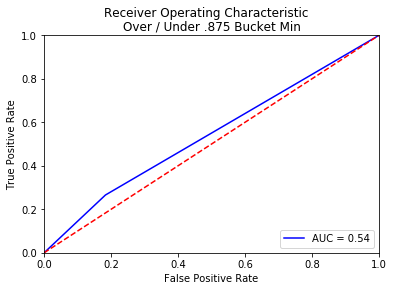

In [127]:
fpr, tpr, threshold = roc_curve(y_test_feat_select, y_pred_feat_select)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.suptitle('Receiver Operating Characteristic')
plt.title('Over / Under .875 Bucket Min')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [128]:
importances = rfc_feat_select.feature_importances_
importance = pd.DataFrame({"features":corr_selected_features,"importance": importances}).sort_values('importance',ascending=False)

importance["std"] = np.std([tree.feature_importances_
                            for tree in rfc_feat_select.estimators_], axis=0)

In [129]:
importance

features  importance       std
0   credit_score                            0.147084    0.120694
16  oldest_collections_account_in_weeks     0.130242    0.111490
1   trades_count                            0.122298    0.061944
5   total_collections_amount                0.095776    0.058567
6   medical_collections_amount              0.088225    0.024683
18  weeks_since_latest_landlord_case        0.075288    0.103866
8   inquiry_count                           0.064823    0.094554
12  landlord_case_count                     0.055761    0.022618
13  landlord_case_total_amount              0.039288    0.072836
2   student_loan_debt_amount                0.039019    0.046648
3   bank_revolving_trades_count             0.036930    0.004664
15  utilities_case_total_amount             0.029002    0.048232
11  medical_collections_account_count       0.024996    0.074544
9   eviction_count                          0.021150    0.062478
14  utilities_case_count                    0.012757    0.035879
7   student_loan_collections_amount         0.006741    0.056843
4   bankruptcy_claim_count                  0.006048    0.115559
17  weeks_since_bankruptcy                  0.004204    0.018910
10  student_loan_collections_account_count  0.000366    0.094593

* Features with high importance have high predictive value across the forest (decrease variance)
* Features with high standard deviation have high predictive value on some trees and not others (decrease bias, potentially increase variance)
* From this reasoning, and considering the number of features to choose from, select top 3rd important features and top 4th features in terms of standard deviation

In [154]:
important_feature_df = importance[(importance['importance'] > importance['importance'].quantile(.66)) | (importance['std'] > importance['std'].quantile(.75))]

In [144]:

important_feature_df = importance[(importance['importance'] > .05) | (importance['std'] > .05)]

In [155]:
important_feature_df

features  importance       std
0   credit_score                            0.147084    0.120694
16  oldest_collections_account_in_weeks     0.130242    0.111490
1   trades_count                            0.122298    0.061944
5   total_collections_amount                0.095776    0.058567
6   medical_collections_amount              0.088225    0.024683
18  weeks_since_latest_landlord_case        0.075288    0.103866
8   inquiry_count                           0.064823    0.094554
4   bankruptcy_claim_count                  0.006048    0.115559
10  student_loan_collections_account_count  0.000366    0.094593

In [156]:
important_features = important_feature_df['features'].values

In [157]:
important_features

array(['credit_score', 'oldest_collections_account_in_weeks',
       'trades_count', 'total_collections_amount',
       'medical_collections_amount', 'weeks_since_latest_landlord_case',
       'inquiry_count', 'bankruptcy_claim_count',
       'student_loan_collections_account_count'], dtype=object)

Now let's train a gbt model on the selected features

In [158]:
def gbtc_model(X_train, y_train, features):
    # perform grid search
    gsc = GridSearchCV(
        estimator=GradientBoostingClassifier(),
        param_grid={
            'learning_rate': [.0001, .001, .01, .1, .2, .3]
            , 'max_depth': range(3,10)
            , 'n_estimators': [10, 20, 50, 100, 1000],
        },
        cv=5
        , verbose=0
        , n_jobs=-1)
    
    grid_result = gsc.fit(X_train[features], y_train)
    best_params = grid_result.best_params_
    
    gbtc = GradientBoostingClassifier(learning_rate=best_params["learning_rate"]
                                ,max_depth=best_params["max_depth"]
                                , n_estimators=best_params["n_estimators"]
                                , random_state=42)
    gbtc.fit(X_train[features], y_train)
    return gbtc

In [159]:
def gbtc_model_train_test(df,features,label):
    driverset = down_sample(df,label)
    X, y = driverset.drop(columns=label), driverset[label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
    return X_test, y_test, gbtc_model_train(X_train, y_train,features)

In [160]:
padsplit_label = 'label'
X_test, y_test, gbtc = rfc_model_train_test(padsplit_pdf
                                             ,important_features
                                             ,padsplit_label
                                            )
                                                                                                                                  


Downsample time.
Downsample completed


In [161]:
scikit_score = gbtc.score(X_test[important_features],y_test)
print('Scikit score: ', scikit_score)

Scikit score:  0.4892086330935252


In [162]:
y_pred = gbtc.predict(X_test[important_features])
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)
print('F1: %.3f' % f1)
print('ROC AUC: %.3f' % roc_auc)

Precision: 0.587
Recall: 0.342
F1: 0.432
ROC AUC: 0.513


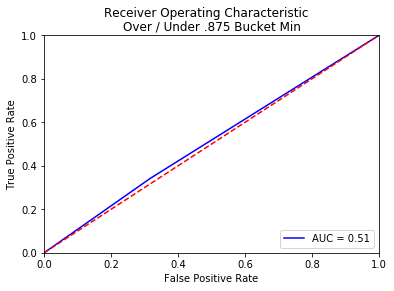

In [163]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.suptitle('Receiver Operating Characteristic')
plt.title('Over / Under .875 Bucket Min')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Assessment
* Overall, model performs not much better than the null case
* Feature importance well distributed among most variables, making feature selection criteria more difficult to ascertain 
    * Feature selected gbt improves recall, but still very low meaning we leave out too many candidates that would actually pass based on our cutoff label
* At least in the early stages, may make sense to simply accept all applicants who pass basic heuristic filters, to decrease friction and get more data in the pipeline

# Next Steps
* Tune bucket_min cutoff to find most predictable value
* Experiment with relaxing feature selection criteria to add more features and decrease bias, eg tune percentile cutoffs
* Look at raw data to see what other features we could generate, eg avg time between credit lines, collections, inquiries, landlord cases etc
* Enrich features with more data sources, eg 
    * alternative credit history
    * debt-to-income ratio
    * security deposit amount
    * intended duration of stay